In [1]:
import pandas as pd
import random
import math
from matplotlib.pyplot import *

import scipy
import scipy.signal

import numpy

In [2]:
data = pd.read_csv("result_number_accounts_hour.csv", delimiter =',')
data

,time_slots,ASSEofficiel,OL,ClermontFoot,MontpellierHSC,OM_Officiel,ogcnice,AS_Monaco,estac_officiel,girondins,...,StadeDeReims,FCMetz,RCSA,AngersSCO,FCNantes,staderennais,RCLens,losclive,FCLorient,SB29
0,2022-01-30T12:00:00.000Z,45,372,1,27,331,23,60,16,578,...,7,1,10,1,6,15,39,11,14,14
1,2022-01-30T13:00:00.000Z,61,233,1,50,336,31,57,8,349,...,20,1,15,13,8,4,21,26,9,23
2,2022-01-30T14:00:00.000Z,47,338,1,26,283,14,22,4,187,...,6,1,11,16,1,21,8,28,2,14
3,2022-01-30T15:00:00.000Z,58,469,1,35,171,20,34,14,138,...,6,2,40,59,5,13,11,2,28,23
4,2022-01-30T16:00:00.000Z,191,3513,6,40,168,13,36,36,76,...,6,27,30,12,6,10,13,11,30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-02-06T07:00:00.000Z,53,127,3,6,29,8,64,4,28,...,5,6,3,5,5,13,36,34,13,16
164,2022-02-06T08:00:00.000Z,144,147,15,7,144,33,89,22,66,...,17,22,20,7,17,51,61,49,23,53
165,2022-02-06T09:00:00.000Z,175,196,26,24,136,42,92,28,119,...,27,30,58,5,42,43,76,76,25,47
166,2022-02-06T10:00:00.000Z,163,184,40,12,138,38,89,37,69,...,29,21,56,4,21,50,122,116,65,50


In [3]:
b = data.iloc[:, 0] #reading from column 0
a = pd.to_datetime(b, format='%Y-%m-%dT%H:%M:%S.%fZ', errors='ignore')
data['time'] = a

In [4]:
def plot_df(x, y, xlabel='Date', ylabel='Value', dpi=100):
    figure(figsize=(16,5), dpi=dpi)
    plot(x, y)
    gca().set(xlabel=xlabel, ylabel=ylabel)

In [6]:
list_clubs = list(data.columns[1:-1]) 
list_clubs

['ASSEofficiel',
 'OL',
 'ClermontFoot',
 'MontpellierHSC',
 'OM_Officiel',
 'ogcnice',
 'AS_Monaco',
 'estac_officiel',
 'girondins',
 'psg_inside',
 'StadeDeReims',
 'FCMetz',
 'RCSA',
 'AngersSCO',
 'FCNantes',
 'staderennais',
 'RCLens',
 'losclive',
 'FCLorient',
 'SB29']

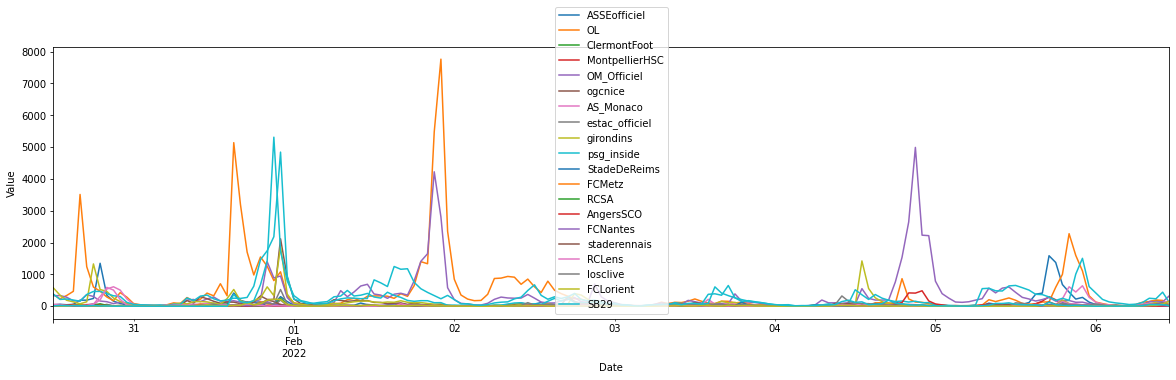

In [7]:
data.plot(x = 'time', y = list_clubs, xlabel='Date', ylabel='Value', figsize=(20,5))
show()

In [10]:
moyenne_per_club = []
for club in list_clubs:
    moyenne = sum(data[club])/data[club].shape[0]
    moyenne_per_club.append(moyenne)

moyenne_per_club

[87.78571428571429,
 447.4583333333333,
 7.089285714285714,
 13.18452380952381,
 336.5238095238095,
 65.07738095238095,
 58.398809523809526,
 8.571428571428571,
 117.26785714285714,
 264.29761904761904,
 10.625,
 12.172619047619047,
 7.458333333333333,
 20.011904761904763,
 8.93452380952381,
 19.767857142857142,
 27.25595238095238,
 38.148809523809526,
 15.047619047619047,
 194.11309523809524]

In [11]:
dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
dict_moy_per_club

{'ASSEofficiel': 87.78571428571429,
 'OL': 447.4583333333333,
 'ClermontFoot': 7.089285714285714,
 'MontpellierHSC': 13.18452380952381,
 'OM_Officiel': 336.5238095238095,
 'ogcnice': 65.07738095238095,
 'AS_Monaco': 58.398809523809526,
 'estac_officiel': 8.571428571428571,
 'girondins': 117.26785714285714,
 'psg_inside': 264.29761904761904,
 'StadeDeReims': 10.625,
 'FCMetz': 12.172619047619047,
 'RCSA': 7.458333333333333,
 'AngersSCO': 20.011904761904763,
 'FCNantes': 8.93452380952381,
 'staderennais': 19.767857142857142,
 'RCLens': 27.25595238095238,
 'losclive': 38.148809523809526,
 'FCLorient': 15.047619047619047,
 'SB29': 194.11309523809524}

In [15]:
over_tweets = []
for club in list_clubs:
    for i in range(0, data[club].shape[0]):
        tweets_number = data[club][i]
        if tweets_number > dict_moy_per_club[club]* 6 :
            information = [club, data['time'][i], tweets_number/dict_moy_per_club[club]]
            over_tweets.append(information)
print(len(over_tweets))
over_tweets

74


[['ASSEofficiel', Timestamp('2022-01-30 19:00:00'), 15.378356387306752],
 ['ASSEofficiel', Timestamp('2022-02-05 17:00:00'), 18.078112286411717],
 ['ASSEofficiel', Timestamp('2022-02-05 18:00:00'), 15.66314076484947],
 ['ASSEofficiel', Timestamp('2022-02-05 19:00:00'), 7.757526444263628],
 ['OL', Timestamp('2022-01-30 16:00:00'), 7.8510103361579295],
 ['OL', Timestamp('2022-01-31 15:00:00'), 11.48710308222367],
 ['OL', Timestamp('2022-01-31 16:00:00'), 7.151503864419406],
 ['OL', Timestamp('2022-02-01 21:00:00'), 12.244715522860602],
 ['OL', Timestamp('2022-02-01 22:00:00'), 17.351336251047584],
 ['ClermontFoot', Timestamp('2022-01-31 13:00:00'), 6.347607052896725],
 ['ClermontFoot', Timestamp('2022-01-31 14:00:00'), 9.309823677581864],
 ['ClermontFoot', Timestamp('2022-01-31 22:00:00'), 34.841309823677584],
 ['ClermontFoot', Timestamp('2022-01-31 23:00:00'), 9.732997481108312],
 ['MontpellierHSC', Timestamp('2022-02-05 16:00:00'), 12.135440180586906],
 ['MontpellierHSC', Timestamp('20

In [14]:
over_tweets = []
for club in list_clubs:
    for i in range(0, data[club].shape[0]):
        tweets_number = data[club][i]
        if tweets_number > dict_moy_per_club[club]* 6 :
            information = [club, data['time'][i], tweets_number]
            over_tweets.append(information)
print(len(over_tweets))
over_tweets

74


[['ASSEofficiel', Timestamp('2022-01-30 19:00:00'), 1350],
 ['ASSEofficiel', Timestamp('2022-02-05 17:00:00'), 1587],
 ['ASSEofficiel', Timestamp('2022-02-05 18:00:00'), 1375],
 ['ASSEofficiel', Timestamp('2022-02-05 19:00:00'), 681],
 ['OL', Timestamp('2022-01-30 16:00:00'), 3513],
 ['OL', Timestamp('2022-01-31 15:00:00'), 5140],
 ['OL', Timestamp('2022-01-31 16:00:00'), 3200],
 ['OL', Timestamp('2022-02-01 21:00:00'), 5479],
 ['OL', Timestamp('2022-02-01 22:00:00'), 7764],
 ['ClermontFoot', Timestamp('2022-01-31 13:00:00'), 45],
 ['ClermontFoot', Timestamp('2022-01-31 14:00:00'), 66],
 ['ClermontFoot', Timestamp('2022-01-31 22:00:00'), 247],
 ['ClermontFoot', Timestamp('2022-01-31 23:00:00'), 69],
 ['MontpellierHSC', Timestamp('2022-02-05 16:00:00'), 160],
 ['MontpellierHSC', Timestamp('2022-02-05 17:00:00'), 301],
 ['MontpellierHSC', Timestamp('2022-02-05 18:00:00'), 204],
 ['OM_Officiel', Timestamp('2022-02-01 21:00:00'), 4225],
 ['OM_Officiel', Timestamp('2022-02-01 22:00:00'), 28